<a href="https://colab.research.google.com/github/charmdust/LLMs-senolytics/blob/main/Finetune_Senolytics_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test out a custom trainer that takes class weights into account

In [ ]:
# Upload csv file of senolytics dataset
from google.colab import files

uploaded_files = files.upload()

Saving list_of_compounds_for_training.csv to list_of_compounds_for_training (2).csv


In [ ]:
import pandas as pd

In [ ]:
# Senolytoc dataset - labelled
senolytics_df = pd.read_csv('list_of_compounds_for_training.csv')
senolytics_df

,Name,senolytic,Library,Source,SMILES,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,Azaguanine-8,0,Prestwick,Not identified,c12/N=C(\NC(c1nn[nH]2)=O)/N,3.024307,441.024163,7.844935,5.327239,5.327239,...,0,0,0,0,0,0,0,0,0,0.430316
1,Allantoin,0,Prestwick,Not identified,N1C(NC(C1=O)NC(=O)N)=O,2.534439,225.377060,8.430721,5.379445,5.379445,...,0,0,0,0,0,0,0,0,2,0.325138
2,Acetazolamide,0,Prestwick,Not identified,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,2.938691,422.352468,10.060478,6.513019,8.146012,...,1,0,0,0,0,0,0,0,0,0.631859
3,Metformin hydrochloride,0,Prestwick,Not identified,C(NC(=N)N)(=N)N(C)C,3.644486,126.919685,7.439158,5.524564,5.524564,...,0,0,0,0,0,0,0,0,0,0.248785
4,Atracurium besylate,0,Prestwick,Not identified,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0.987040,2158.836594,48.141042,41.328212,41.328212,...,0,0,0,0,0,0,0,4,0,0.038349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,Curcumin,1,"GPNCL, ENZO","Source 12 - Yousefzadeh et al, 2018",COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1.958861,822.040000,19.811190,15.008030,15.008030,...,0,0,0,0,0,0,0,0,0,0.548123
2519,Dasatinib,1,"Unknown library, see publication source","Source 13 - Zhu et al, 2015",CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1.431593,1111.432171,23.371668,18.507135,20.079560,...,0,0,0,0,1,0,0,0,0,0.465717
2520,Navitoclax,1,"Unknown library, see publication source","Source 14 - Zhu et al, 2016",CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1.017180,2532.551918,46.408991,36.449290,39.654708,...,1,1,0,0,0,0,0,0,0,0.104649
2521,A1331852,1,"Unknown library, see publication source","Source 15 - Zhu et al, 2017",O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,0.969918,2030.733706,32.569974,26.984648,27.801144,...,0,0,0,0,1,0,0,0,0,0.185260


In [ ]:
training_df = senolytics_df[['SMILES', 'senolytic']]
training_df

,SMILES,senolytic
0,c12/N=C(\NC(c1nn[nH]2)=O)/N,0
1,N1C(NC(C1=O)NC(=O)N)=O,0
2,c1(S(=O)(=O)N)sc(nn1)NC(=O)C,0
3,C(NC(=N)N)(=N)N(C)C,0
4,[N+]1(C(c2c(cc(c(c2)OC)OC)CC1)Cc1cc(c(cc1)OC)O...,0
...,...,...
2518,COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(...,1
2519,CC1=C(C(=CC=C1)Cl)NC(=O)C2=CN=C(S2)NC3=CC(=NC(...,1
2520,CC1(CCC(=C(C1)CN2CCN(CC2)C3=CC=C(C=C3)C(=O)NS(...,1
2521,O=C(NC1=NC(C=CC=C2)=C2S1)C3=C(CN(C4=CC=C(C5=C(...,1


In [ ]:
# # Subset for testing new code

# training_df =  training_df.groupby('senolytic', group_keys=False).apply(lambda x: x.sample(frac=0.1))
# training_df



In [ ]:
# Check sample is representative of the actual distribution
sum(training_df['senolytic'])/len(training_df)

0.022988505747126436

## Setup  
from https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Transfer_Learning_With_ChemBERTa_Transformers.ipynb

In [ ]:
# !curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
# import conda_installer
# conda_installer.install()
# !/root/miniconda/bin/conda info -e

In [ ]:
# #!pip install --pre deepchem
# import deepchem
# deepchem.__version__

In [ ]:
#from rdkit import Chem

Imports from https://github.com/seyonechithrananda/bert-loves-chemistry/blob/master/chemberta/visualization/ChemBERTA_dimensionaliy_reduction_BBBP.ipynb

In [ ]:
import os
import time
from typing import List

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#from rdkit import Chem, DataStructs
#from rdkit.Chem.rdchem import Mol
#from rdkit.Chem.MolStandardize.rdMolStandardize import LargestFragmentChooser


In [ ]:
# On Google Colab, you may need to restart the runtime after this
!pip install requests bs4 transformers torch torchvision umap-learn matplotlib dill ortools
!pip install --upgrade plotly

## Finetune
https://huggingface.co/docs/transformers/training

In [ ]:
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config = AutoConfig.from_pretrained("DeepChem/ChemBERTa-77M-MTR")
config.num_hidden_layers += 1
model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")

print(f"Model size: {model.num_parameters()} parameters.")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model size: 3428210 parameters.


In [ ]:
from sklearn.model_selection import train_test_split
X = training_df[['SMILES']]
y = training_df['senolytic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # the data should be shuffled


In [ ]:
# Dataset set up

#smiles_train = X_train['SMILES'].astype(str).tolist()
#smiles_test = X_test['SMILES'].astype(str).tolist()


In [ ]:
# # https://huggingface.co/transformers/v3.2.0/custom_datasets.html -> does not work!!
# from transformers import AutoTokenizer, AutoModel
# import torch


# class SenolyticsDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         #print(idx)
#         input_ids = torch.tensor(self.encodings['input_ids'])
#         if self.labels is not None and idx in self.labels.keys():
#             target_ids = torch.tensor(self.labels[idx])
#         else:
#             # Handle the case where self.labels is None or idx is out of range
#             target_ids = None
#         return {"input_ids": input_ids, "labels": target_ids}

#     def __len__(self):
#         return len(self.labels)
# #train_dataset = IMDbDataset(train_encodings, train_labels)
# #val_dataset = IMDbDataset(val_encodings, val_labels)
# #test_dataset = IMDbDataset(test_encodings, test_labels)

# tokenized_train = tokenizer(smiles_train, padding=True, truncation=True, max_length=None, return_tensors='pt')
# tokenized_test = tokenizer(smiles_test, padding=True, truncation=True, max_length=None, return_tensors='pt')

# train_dataset = SenolyticsDataset(tokenized_train, y_train)
# test_dataset = SenolyticsDataset(tokenized_test, y_test)


In [ ]:
import torch

#Current version
class Dataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, labels, tokenizer):
        self.dataframe = dataframe
        self.tokenizer = tokenizer

        # Tokenize the SMILES strings and store them
        self.encodings = self.tokenize_smiles(dataframe['SMILES'].tolist())

        # Store the labels
        self.labels = labels.tolist()

    def tokenize_smiles(self, smiles_list):
        return self.tokenizer(
            smiles_list,
            truncation=True,
            padding=True,
            max_length=None,
            return_tensors='pt'
        )

    def __getitem__(self, idx):
        item = {
            'input_ids': self.encodings['input_ids'][idx],
            'attention_mask': self.encodings['attention_mask'][idx],
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }
        return item

    def __len__(self):
        return len(self.labels)


In [ ]:
train_dataset = Dataset(X_train, y_train, tokenizer)
test_dataset = Dataset(X_test, y_test, tokenizer)

In [ ]:
type(train_dataset[-1]['input_ids'])

torch.Tensor

In [ ]:
!pip install transformers[torch]

In [ ]:
!pip install accelerate -U

In [ ]:
!pip install optuna

In [ ]:
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-6, 1e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [16, 32, 64, 128]),
        "weight_decay": trial.suggest_loguniform("weight_decay", 4e-5, 0.01)
    }

In [ ]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_1", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=10) # switch optimizer to avoid warning)


In [ ]:
!pip install evaluate

In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("f1")

In [ ]:
# https://stackoverflow.com/questions/67457480/how-to-get-the-accuracy-per-epoch-or-step-for-the-huggingface-transformers-train

def compute_metrics(eval_pred):
    metrics = ["accuracy", "recall", "precision", "f1"] #List of metrics to return
    metric={}
    for met in metrics:
       metric[met] = evaluate.load(met)
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    metric_res={}
    for met in metrics:
       metric_res[met]=metric[met].compute(predictions=predictions, references=labels)[met]
    return metric_res

In [ ]:
# Class weights

from sklearn.utils.class_weight import compute_class_weight



class_weights = compute_class_weight(class_weight="balanced",classes=np.unique(y_train),y=y_train)


print(class_weights)

[ 0.51188406 21.53658537]


In [ ]:
# https://huggingface.co/docs/transformers/main/main_classes/trainer

from torch import nn
from transformers import Trainer


class CustomTrainer(Trainer):

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels").long()
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss with class_weights=balanced from above
        loss_fct = nn.CrossEntropyLoss(weight=torch.tensor(class_weights, device=model.device, dtype=torch.float))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [30]:
#https://medium.com/carbon-consulting/transformer-models-hyperparameter-optimization-with-the-optuna-299e185044a8
import optuna

def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained("DeepChem/ChemBERTa-77M-MTR", num_labels=2, problem_type = "single_label_classification")
    training_args = TrainingArguments(
        output_dir="optuna-test",
        learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
        weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.01),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=4, high=10),
        per_device_train_batch_size=8,
        per_device_eval_batch_size=8,
        disable_tqdm=True,
    )
    trainer = CustomTrainer(
      model=model,
      args=training_args,
      train_dataset=train_dataset,#hyperparameter optimisation on whole dataset, retrain then
      eval_dataset=test_dataset,
      compute_metrics=compute_metrics,
    )

    result = trainer.train()

    predictions = trainer.predict(test_dataset)
    y_pred = np.argmax(predictions.predictions, axis=-1)

    #final_score = metric.compute(predictions=y_pred, references=y_test)


    trainer.train()
    results = trainer.evaluate()
    return results['eval_f1']


# We want to minimise the f1
study = optuna.create_study(study_name="hyper-parameter-search", direction="minimize")
study.optimize(func=objective, n_trials=5)
print(study.best_value)
print(study.best_params)
print(study.best_trial)

[I 2023-10-18 09:30:08,378] A new study created in memory with name: hyper-parameter-search
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-146b4532d830>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
<ipython-input-30-146b4532d830>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_flo

{'loss': 0.63, 'learning_rate': 0.00013009338985175243, 'epoch': 2.26}
{'loss': 0.3442, 'learning_rate': 8.640857123128487e-05, 'epoch': 4.52}
{'loss': 0.1905, 'learning_rate': 4.2723752610817286e-05, 'epoch': 6.79}
{'train_runtime': 2677.9757, 'train_samples_per_second': 5.935, 'train_steps_per_second': 0.743, 'train_loss': 0.3131242333014686, 'epoch': 9.0}


{'loss': 0.1323, 'learning_rate': 0.00013009338985175243, 'epoch': 2.26}
{'loss': 0.1056, 'learning_rate': 8.640857123128487e-05, 'epoch': 4.52}
{'loss': 0.0117, 'learning_rate': 4.2723752610817286e-05, 'epoch': 6.79}
{'train_runtime': 2556.4199, 'train_samples_per_second': 6.217, 'train_steps_per_second': 0.778, 'train_loss': 0.06395601423137928, 'epoch': 9.0}


[I 2023-10-18 10:58:41,742] Trial 0 finished with value: 0.5714285714285714 and parameters: {'learning_rate': 0.00017377820847222, 'weight_decay': 0.00018532894895884004, 'num_train_epochs': 9}. Best is trial 0 with value: 0.5714285714285714.


{'eval_loss': 0.8344146013259888, 'eval_accuracy': 0.9841479524438573, 'eval_recall': 0.47058823529411764, 'eval_precision': 0.7272727272727273, 'eval_f1': 0.5714285714285714, 'eval_runtime': 38.6866, 'eval_samples_per_second': 19.567, 'eval_steps_per_second': 2.456, 'epoch': 9.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-146b4532d830>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
<ipython-input-30-146b4532d830>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.0

{'loss': 1.2615, 'learning_rate': 0.004535619419056348, 'epoch': 2.26}
{'loss': 1.077, 'learning_rate': 0.0017900870830658226, 'epoch': 4.52}
{'train_runtime': 1686.3979, 'train_samples_per_second': 6.283, 'train_steps_per_second': 0.786, 'train_loss': 1.0776350386721696, 'epoch': 6.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': 1.2765, 'learning_rate': 0.004535619419056348, 'epoch': 2.26}
{'loss': 1.0032, 'learning_rate': 0.0017900870830658226, 'epoch': 4.52}
{'train_runtime': 1680.5184, 'train_samples_per_second': 6.305, 'train_steps_per_second': 0.789, 'train_loss': 1.0703633626302083, 'epoch': 6.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-10-18 11:56:05,673] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.007281151755046874, 'weight_decay': 0.0019713360151136887, 'num_train_epochs': 6}. Best is trial 1 with value: 0.0.


{'eval_loss': 0.7344096899032593, 'eval_accuracy': 0.9775429326287979, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 39.1548, 'eval_samples_per_second': 19.334, 'eval_steps_per_second': 2.426, 'epoch': 6.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-146b4532d830>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
<ipython-input-30-146b4532d830>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.0

{'loss': 0.7043, 'learning_rate': 3.3666717530282294e-05, 'epoch': 2.26}
{'loss': 0.5842, 'learning_rate': 5.842984034181223e-06, 'epoch': 4.52}
{'train_runtime': 1400.778, 'train_samples_per_second': 6.304, 'train_steps_per_second': 0.789, 'train_loss': 0.6384969616367806, 'epoch': 5.0}
{'loss': 0.5326, 'learning_rate': 3.3666717530282294e-05, 'epoch': 2.26}
{'loss': 0.4138, 'learning_rate': 5.842984034181223e-06, 'epoch': 4.52}
{'train_runtime': 1392.1035, 'train_samples_per_second': 6.343, 'train_steps_per_second': 0.794, 'train_loss': 0.4579883696266968, 'epoch': 5.0}


[I 2023-10-18 12:43:57,184] Trial 2 finished with value: 0.48 and parameters: {'learning_rate': 6.149045102638335e-05, 'weight_decay': 0.0016623221229412066, 'num_train_epochs': 5}. Best is trial 1 with value: 0.0.


{'eval_loss': 0.513519823551178, 'eval_accuracy': 0.9828269484808454, 'eval_recall': 0.35294117647058826, 'eval_precision': 0.75, 'eval_f1': 0.48, 'eval_runtime': 39.0471, 'eval_samples_per_second': 19.387, 'eval_steps_per_second': 2.433, 'epoch': 5.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-146b4532d830>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
<ipython-input-30-146b4532d830>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.0

{'loss': 1.0643, 'learning_rate': 0.0032456483936995585, 'epoch': 2.26}
{'loss': 1.0125, 'learning_rate': 0.002296628395541793, 'epoch': 4.52}
{'loss': 0.8099, 'learning_rate': 0.0013476083973840273, 'epoch': 6.79}
{'loss': 0.8667, 'learning_rate': 0.00039858839922626155, 'epoch': 9.05}
{'train_runtime': 2777.7834, 'train_samples_per_second': 6.358, 'train_steps_per_second': 0.796, 'train_loss': 0.921299308673289, 'epoch': 10.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': 1.0371, 'learning_rate': 0.0032456483936995585, 'epoch': 2.26}
{'loss': 0.986, 'learning_rate': 0.002296628395541793, 'epoch': 4.52}
{'loss': 0.8363, 'learning_rate': 0.0013476083973840273, 'epoch': 6.79}
{'loss': 0.8312, 'learning_rate': 0.00039858839922626155, 'epoch': 9.05}
{'train_runtime': 2803.1129, 'train_samples_per_second': 6.3, 'train_steps_per_second': 0.788, 'train_loss': 0.9068077605234551, 'epoch': 10.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-10-18 14:18:11,550] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.004194668391857324, 'weight_decay': 0.00014062838017247755, 'num_train_epochs': 10}. Best is trial 1 with value: 0.0.


{'eval_loss': 0.7252764105796814, 'eval_accuracy': 0.9775429326287979, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 37.0357, 'eval_samples_per_second': 20.44, 'eval_steps_per_second': 2.565, 'epoch': 10.0}


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-30-146b4532d830>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform("learning_rate", low=4e-5, high=0.01),
<ipython-input-30-146b4532d830>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 4e-5, 0.0

{'loss': 0.8794, 'learning_rate': 0.0012528462442022333, 'epoch': 2.26}
{'loss': 0.8208, 'learning_rate': 0.00021743612502683385, 'epoch': 4.52}
{'train_runtime': 1418.2534, 'train_samples_per_second': 6.226, 'train_steps_per_second': 0.779, 'train_loss': 0.8347639196059283, 'epoch': 5.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'loss': 0.848, 'learning_rate': 0.0012528462442022333, 'epoch': 2.26}
{'loss': 0.794, 'learning_rate': 0.00021743612502683385, 'epoch': 4.52}
{'train_runtime': 1410.6884, 'train_samples_per_second': 6.259, 'train_steps_per_second': 0.783, 'train_loss': 0.8189935399396387, 'epoch': 5.0}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[I 2023-10-18 15:06:38,260] Trial 4 finished with value: 0.0 and parameters: {'learning_rate': 0.0022882563633776325, 'weight_decay': 0.0004389343798246106, 'num_train_epochs': 5}. Best is trial 1 with value: 0.0.


{'eval_loss': 0.7002424001693726, 'eval_accuracy': 0.9775429326287979, 'eval_recall': 0.0, 'eval_precision': 0.0, 'eval_f1': 0.0, 'eval_runtime': 38.4456, 'eval_samples_per_second': 19.69, 'eval_steps_per_second': 2.471, 'epoch': 5.0}
0.0
{'learning_rate': 0.007281151755046874, 'weight_decay': 0.0019713360151136887, 'num_train_epochs': 6}
FrozenTrial(number=1, state=TrialState.COMPLETE, values=[0.0], datetime_start=datetime.datetime(2023, 10, 18, 10, 58, 41, 744528), datetime_complete=datetime.datetime(2023, 10, 18, 11, 56, 5, 672809), params={'learning_rate': 0.007281151755046874, 'weight_decay': 0.0019713360151136887, 'num_train_epochs': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=0.01, log=True, low=4e-05, step=None), 'weight_decay': FloatDistribution(high=0.01, log=True, low=4e-05, step=None), 'num_train_epochs': IntDistribution(high=10, log=False, low=4, step=1)}, trial_id=1, value=None)


In [31]:
print(study.best_params)

{'learning_rate': 0.007281151755046874, 'weight_decay': 0.0019713360151136887, 'num_train_epochs': 6}


In [32]:
from transformers import TrainingArguments, Trainer

# many more parameters to experiment with https://huggingface.co/docs/transformers/v4.33.2/en/main_classes/trainer#transformers.TrainingArguments
training_args = TrainingArguments(output_dir="test_1", load_best_model_at_end=True, evaluation_strategy='epoch',
    logging_strategy="epoch", save_strategy="epoch",per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=64,optim="adamw_torch", num_train_epochs=study.best_params['num_train_epochs'], learning_rate=study.best_params['learning_rate'],
                                  weight_decay=study.best_params['weight_decay']) # switch optimizer to avoid warning)


In [33]:
from transformers import TrainerCallback
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Define a callback for printing validation loss
class PrintValidationLossCallback(TrainerCallback):
    def on_evaluate(self, args, state, control, **kwargs):
        if state is not None and hasattr(state, 'eval_loss'):
            print(f"Validation loss: {state.eval_loss:.4f}")

# Add the callback to the trainer
trainer.add_callback(PrintValidationLossCallback())
#trainer.train()

In [34]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,1.636000,1.484427,0.977543,0.000000,0.000000,0.000000
2,1.792300,0.742870,0.977543,0.000000,0.000000,0.000000
3,1.110600,1.371101,0.977543,0.000000,0.000000,0.000000
4,0.888400,3.486738,0.977543,0.000000,0.000000,0.000000
5,1.236600,1.994936,0.977543,0.000000,0.000000,0.000000
6,1.109200,1.726892,0.977543,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

TrainOutput(global_step=666, training_loss=1.2955103121004305, metrics={'train_runtime': 2389.3408, 'train_samples_per_second': 4.435, 'train_steps_per_second': 0.279, 'total_flos': 49583759060160.0, 'train_loss': 1.2955103121004305, 'epoch': 6.0})

In [ ]:
# Save the model
trainer.save_model("./output_1")

In [ ]:
predictions = trainer.predict(test_dataset)

In [ ]:
y_pred = np.argmax(predictions.predictions, axis=-1)
y_pred

In [ ]:
y_test.sum()

In [39]:
# senolytics predicted
y_pred.sum()

0

In [ ]:
trainer.state.log_history



In [ ]:
training_losses = [element['loss'] for element in trainer.state.log_history if 'loss' in element.keys()]
val_losses = [element['eval_loss'] for element in trainer.state.log_history if 'eval_loss' in element.keys()]

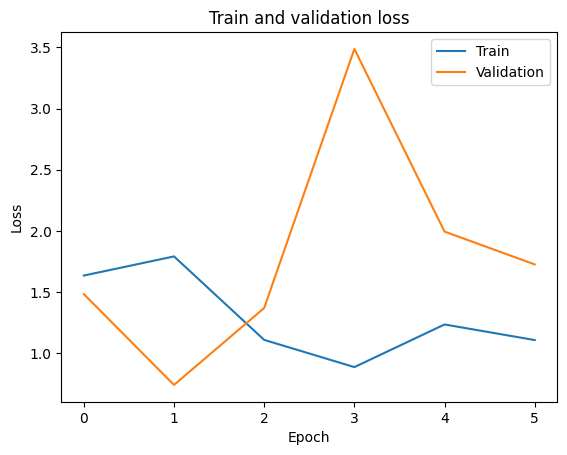

In [42]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.title("Train and validation loss")
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.xticks([i for i in range(0,len(val_losses))])
plt.legend(['Train', 'Validation'])
plt.show()

Accuracy: 0.9775429326287979
Precision: 0.0
Recall: 0.0
F1: 0.0




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


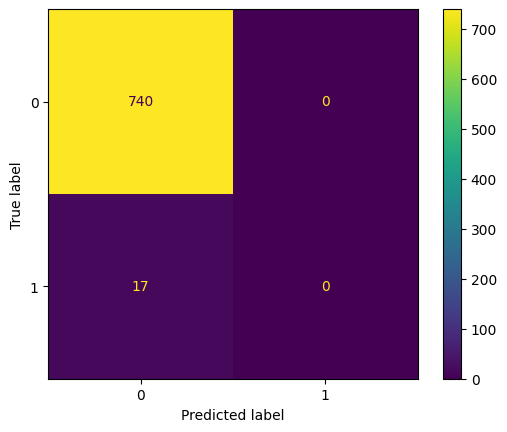

In [43]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay,
)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


print("\n")
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()

plt.show()




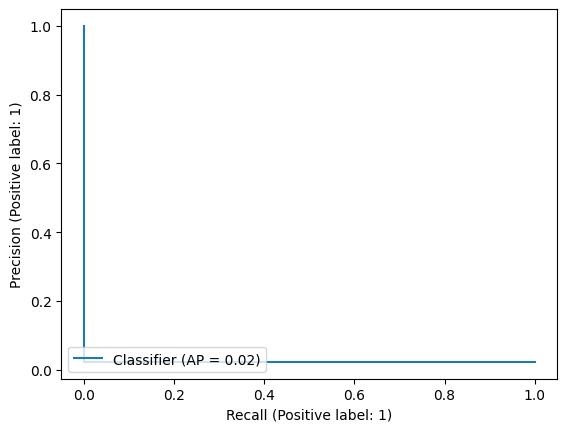

In [44]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.PrecisionRecallDisplay.html
from sklearn.metrics import (precision_recall_curve,
                              PrecisionRecallDisplay)

disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()



In [45]:
# https://stackoverflow.com/questions/67432457/python-get-the-index-of-two-list-where-the-values-are-the-same
print([i for i, v in enumerate(list(y_pred)) if v == list(y_test)[i] and v==1])

[]


In [46]:
#X_test.iloc[213]

In [47]:
X_test.iloc[244]

SMILES    c12c(\C(=C/C(O1)=O)\C)cc1c(c2C)oc(c1)C
Name: 702, dtype: object

SMILES    c12c(\C(=C/C(O1)=O)\C)cc1c(c2C)oc(c1)C
Name: 702, dtype: object

In [48]:
print(study.best_value)
print(study.best_params)

0.0
{'learning_rate': 0.007281151755046874, 'weight_decay': 0.0019713360151136887, 'num_train_epochs': 6}
